# Using the Unscented Kalman Filter and Smoother

This simple example shows how one may apply the Unscented Kalman Filter and
Unscented Kalman Smoother to some randomly generated data.

The Unscented Kalman Filter (UKF) and Rauch-Rung-Striebel type Unscented Kalman
Smoother (UKS) are a generalization of the traditional Kalman Filter and
Smoother to models with non-linear equations describing state transitions and
observation emissions. Unlike the Extended Kalman Filter (EKF), which attempts
to perform the same task by using the numerical derivative of the appropriate
equations, the UKF selects a handful of "sigma points", passes them through the
appropriate function, then finally re-estimates a normal distribution around
those propagated points. Experiments have shown that the UKF and UKS are
superior to the EKF and EKS in nearly all scenarios.

The figure drawn shows the true, hidden state; the state estimates given by the
UKF; and finally the same given by the UKS.

In [2]:
import numpy as np
import pylab as pl
from pykalman import UnscentedKalmanFilter

First, we will initialize parameters.

In [3]:
def transition_function(state, noise):
    a = np.sin(state[0]) + state[1] * noise[0]
    b = state[1] + noise[1]
    return np.array([a, b])


def observation_function(state, noise):
    C = np.array([[-1, 0.5], [0.2, 0.1]])
    return np.dot(C, state) + noise

In [4]:
transition_covariance = np.eye(2)
random_state = np.random.RandomState(0)
observation_covariance = np.eye(2) + random_state.randn(2, 2) * 0.1
initial_state_mean = [0, 0]
initial_state_covariance = [[1, 0.1], [-0.1, 1]]

Then, sample from the model.

In [8]:
kf = UnscentedKalmanFilter(
    transition_function,
    observation_function,
    transition_covariance,
    observation_covariance,
    initial_state_mean,
    initial_state_covariance,
    random_state=random_state,
)
states, observations = kf.sample(50, initial_state_mean)

Estimate state with filtering and smoothing.

In [6]:
filtered_state_estimates = kf.filter(observations)[0]
smoothed_state_estimates = kf.smooth(observations)[0]

Finally, we will plot the estimates.

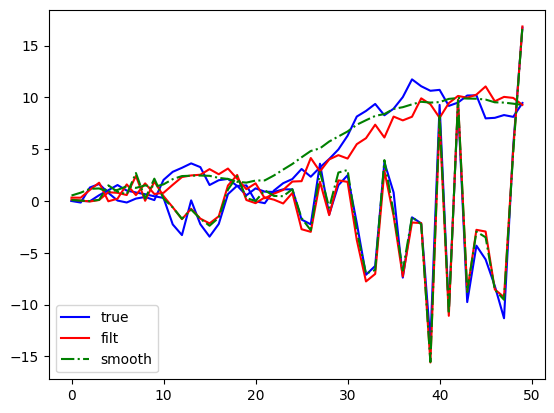

In [7]:
pl.figure()
lines_true = pl.plot(states, color="b")
lines_filt = pl.plot(filtered_state_estimates, color="r", ls="-")
lines_smooth = pl.plot(smoothed_state_estimates, color="g", ls="-.")
pl.legend(
    (lines_true[0], lines_filt[0], lines_smooth[0]),
    ("true", "filt", "smooth"),
    loc="lower left",
)
pl.show()